## Tujuan Bisnis Data Science
saya ditugaskan untuk melakukan prediksi terhadap kemungkinan terjadinya penyakit 
jantung. Diharapkan pemodelan yang dihasilkan dapat membantu kinerja dokter dalam mendeteksi pasien dengan 
penyakit jantung, sehingga dapat menolong lebih banyak orang yang berisiko tinggi terkena penyakit 
kardiovaskuler.

## Tujuna Teknis Data Science
- Membuat model klasifikasi menggunakan decision tree dan satu model pilihan lainnya
- menginterpretasikan fitur-fitur mana yang paling berpengaruh
- evaluasi :
  - Confusion matrix
  - Accuracy
  - Precision
  - Recall
  - F1-score


## Pengambilan Data
Untuk pengambilan data sudah disediakan oleh asesor, oleh karena itu metode yang saya gunakan untuk pengambilan datanya dengan cara mendownloadnya melalui github atau bisa juga menggunakan github API

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# integrasi dataset

In [7]:
df = pd.read_csv('heart (1).csv')

In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,NaN,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


- Age: Usia pasien.
- Sex: Jenis kelamin pasien ('M' untuk male dan 'F' untuk female).
- ChestPainType: Tipe nyeri dada yang dialami (ATA, NAP, ASY, dll).
- RestingBP: Tekanan darah saat istirahat.
- Cholesterol: Kadar kolesterol.
- FastingBS: Gula darah puasa (0 jika < 120 mg/dl, 1 jika > 120 mg/dl).
- RestingECG: Hasil elektrokardiogram saat istirahat.
- MaxHR: Denyut jantung maksimal yang dicapai.
- ExerciseAngina: Angina yang terjadi selama olahraga (Y jika Ya, N jika Tidak).
- Oldpeak: ST depression yang diinduksi oleh olahraga dibandingkan dengan istirahat.
- ST_Slope: Slope dari segmen ST peak exercise (Up, Flat, Down).
- HeartDisease: Apakah pasien memiliki penyakit jantung (0 untuk tidak, 1 untuk ya).

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,911.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.102086,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.988393,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# pengecekan tipe data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             911 non-null    float64
 1   Sex             908 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


## Analisis Tipe Data
Dari dataset yang dimemiliki:

- Numerik: Age, RestingBP, Cholesterol, MaxHR, Oldpeak, dan HeartDisease (binary, int64).
- Kategorikal: Sex, ChestPainType, RestingECG, ExerciseAngina, dan ST_Slope

In [11]:
df.isna().sum()

Age                7
Sex               10
ChestPainType      0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

In [12]:
df['Sex'].unique() #RestingECG, ExerciseAngina, ST_Slope, HeartDisease

array(['M', 'F', nan], dtype=object)

In [13]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)
df['Age'] = df['Age'].astype(int)

# Cek lagi apakah masih ada nilai yang hilang
df.isnull().sum()

C:\Users\indra\AppData\Local\Temp\ipykernel_14820\673664167.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\indra\AppData\Local\Temp\ipykernel_14820\673664167.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
df['Age'].isna().sum()

0

In [15]:
df['Sex'].isna().sum()

0

## kelengkapan data
dataset yang digunakan memiliki nilai yang hilang pada kolom berikut:
- Age: 7 yang Nan untuk penanganan data yang Nan saya menggunakan median untuk mengganti nilai Nan
- Sex: 10 nilai yang Nan. karena nilai yang hilang sangat sedikit maka dari itu saya memutuskan untuk menggunakan imputasi modus untuk kolom Age dan modus untuk kolom Sex

# oulier

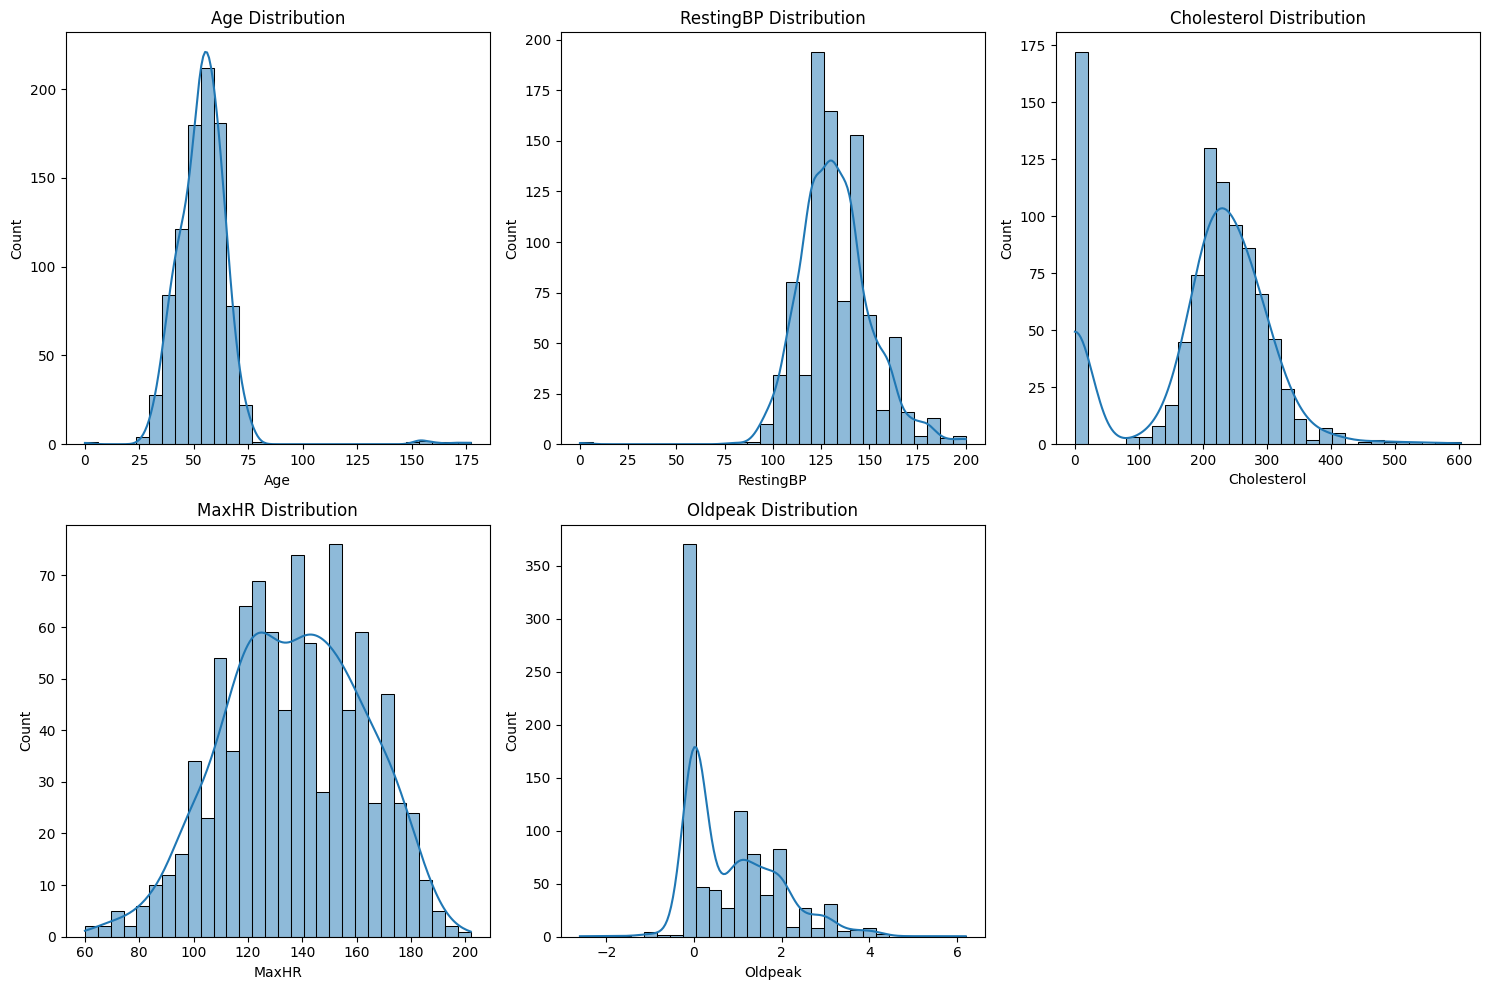

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,54.101307,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,12.938727,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,177.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [16]:
description = df.describe()
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(df['Age'], bins=30, kde=True, ax=ax[0,0]).set(title='Age Distribution')
sns.histplot(df['RestingBP'], bins=30, kde=True, ax=ax[0,1]).set(title='RestingBP Distribution')
sns.histplot(df['Cholesterol'], bins=30, kde=True, ax=ax[0,2]).set(title='Cholesterol Distribution')
sns.histplot(df['MaxHR'], bins=30, kde=True, ax=ax[1,0]).set(title='MaxHR Distribution')
sns.histplot(df['Oldpeak'], bins=30, kde=True, ax=ax[1,1]).set(title='Oldpeak Distribution')
ax[1,2].axis('off')

plt.tight_layout()
plt.show()

description

## Statistik Deskriptif
- pada kolom Age: Rata-rata umur adalah sekitar 54 tahun. Nilai minimum 0 dan maksimum 177 menunjukkan ada data yang tidak realistis yang perlu dibersihkan.
- pada kolom RestingBP: Tekanan darah rata-rata saat istirahat adalah 132 mmHg, dengan nilai minimum 0 yang juga tidak realistis.
- pada kolom Cholesterol: Rata-rata kadar kolesterol adalah 199 mg/dL. Terdapat nilai minimum 0, yang menunjukkan kemungkinan data yang hilang atau tidak tercatat.
- pda kolom MaxHR: Rata-rata denyut jantung maksimal adalah sekitar 137 bpm.
- pada kolom Oldpeak: Nilai rata-rata adalah 0.89, dengan rentang yang cukup lebar (-2.6 hingga 6.2).

In [17]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

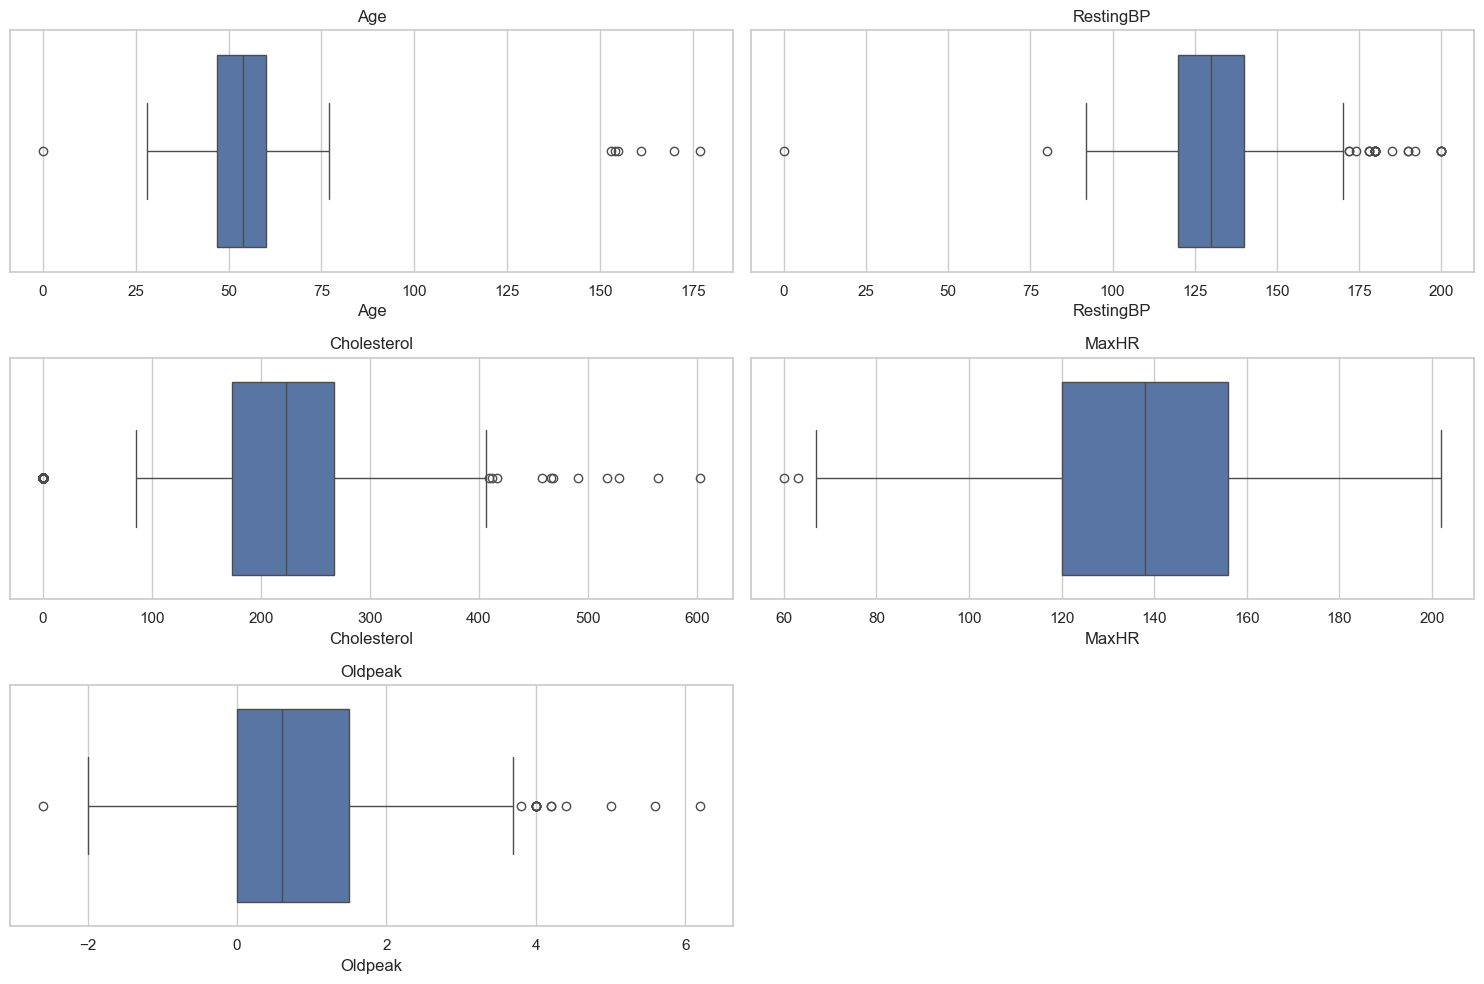

In [18]:
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# boxplot untuk fitur numerikal
continuous_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for i, col in enumerate(continuous_columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'{col}')

plt.tight_layout()
plt.show()


dengan menggunakan boxplot terlihat oulier pada sejumlah kolom diantaranya pada kolom 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'
sebelum masuk kepenanganan outlier saya akan mencoba untuk mengecek berapa persen jumlah oulier dari keseluruhan data

In [19]:
from scipy.stats import zscore
z_scores = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
percentage_outliers = outliers.mean() * 100
percentage_outliers

2.832244008714597

jumlah outlier pada dataset hanya 2,83% ini cukup kecil karena kurang dari 5% maka saya akan mengatasi outlier menggunakan menghapusnya karena cara ini adalah cara paling sederhana 
atau bisa juga menggunakan median

In [20]:
# Remove outliers menggunakan z-score
df_no_outliers = df[~outliers]

num_rows_before = df.shape[0]
num_rows_after = df_no_outliers.shape[0]
num_rows_before, num_rows_after, df_no_outliers.describe()

(918,
 892,
               Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
 count  892.000000  892.000000   892.000000  892.000000  892.000000   
 mean    53.437220  131.969731   198.241031    0.232063  137.010090   
 std      9.416506   17.133862   107.098448    0.422386   25.402902   
 min     28.000000   80.000000     0.000000    0.000000   63.000000   
 25%     47.000000  120.000000   175.000000    0.000000  120.000000   
 50%     54.000000  130.000000   222.000000    0.000000  138.000000   
 75%     60.000000  140.000000   266.000000    0.000000  156.000000   
 max     77.000000  185.000000   518.000000    1.000000  202.000000   
 
           Oldpeak  HeartDisease  
 count  892.000000    892.000000  
 mean     0.859529      0.545964  
 std      1.008766      0.498162  
 min     -2.000000      0.000000  
 25%      0.000000      0.000000  
 50%      0.500000      1.000000  
 75%      1.500000      1.000000  
 max      4.000000      1.000000  )

pada feature yang saya pilih terdapat outlier pada kolom numerik (Age, MaxHR, Oldpeak). dari keseluruhan jumlah data presentasi outlier hanya 2.83% ini memungkinkan saya untuk menghapus oulier karena masih dalam ambang toleransi yaitu <5%

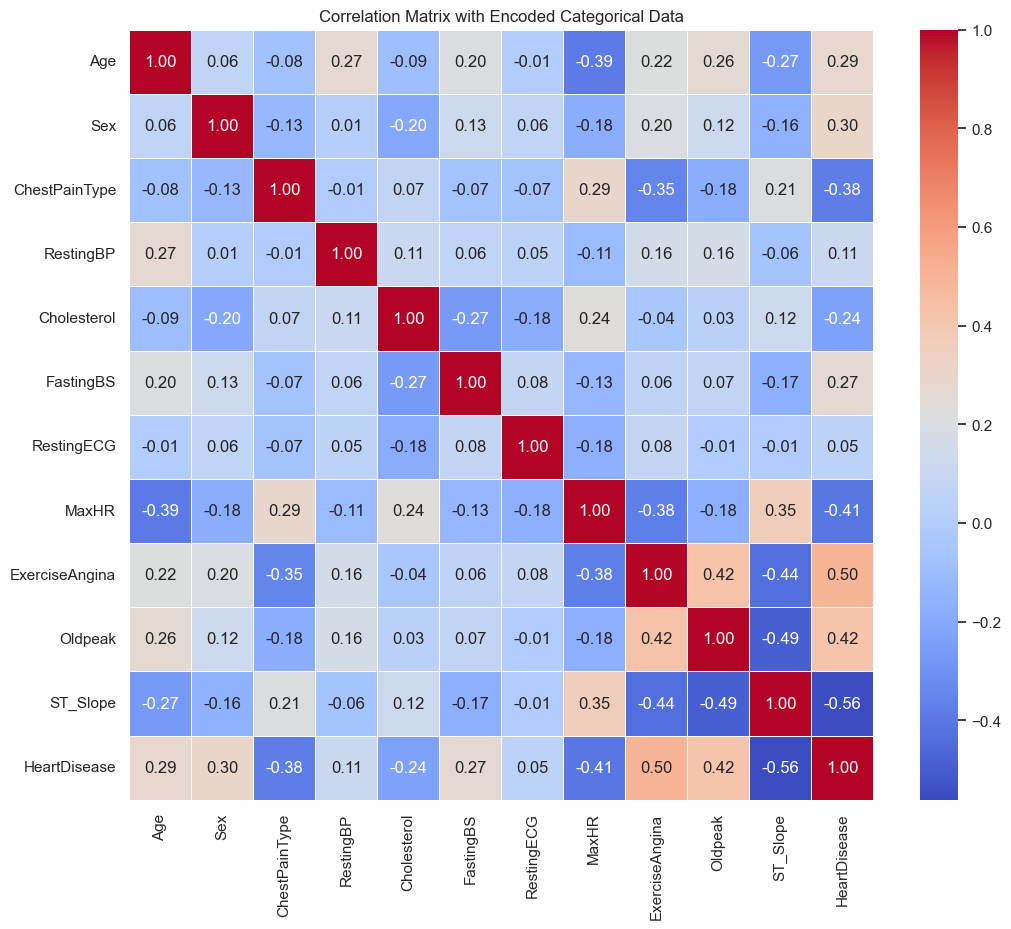

In [21]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df_no_outliers.copy()

# label encoding untuk kolom kategorikal
label_encoder = LabelEncoder()
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column].astype(str))

correlation_matrix_encoded = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix with Encoded Categorical Data')
plt.show()

## analisis korelasi 
pada hasil korelasi fitur fitur HeartDisease dengan menunjukan bahwa:

- MaxHR(denyut janung) dan HeartDisease (-0.40): Korelasi negatif antara MaxHR (denyut jantung maksimal) dan HeartDisease menunjukkan bahwa semakin rendah MaxHR yang dicapai selama tes, semakin tinggi risiko penyakit jantung.

- Oldpeak dan HeartDisease (0.40): Korelasi positif menunjukkan bahwa semakin tinggi Oldpeak (ST depression diinduksi oleh olahraga relatif terhadap istirahat), semakin tinggi risiko penyakit jantung. Ini mencerminkan dampak negatif dari latihan terhadap jantung yang mungkin menandakan masalah kardiovaskular.

- ExerciseAngina dan HeartDisease (0.49): Korelasi positif yang kuat menunjukkan bahwa adanya angina saat berolahraga sangat terkait dengan keberadaan penyakit jantung.

- ST_Slope dan HeartDisease (-0.56): Slope dari segmen ST saat peak exercise yang flat atau down berkorelasi negatif dengan penyakit jantung, menunjukkan risiko yang lebih tinggi dibandingkan slope 'Up'.

- ChestPainType dan HeartDisease (0.39): Korelasi positif menunjukkan bahwa jenis nyeri dada tertentu (seperti ASY – asymptomatic) lebih sering dikaitkan dengan penyakit jantung.

# pemilihan fitur

In [22]:
feature_correlation = df_encoded.corr()['HeartDisease'].sort_values()
print(feature_correlation)

ST_Slope         -0.560650
MaxHR            -0.406896
ChestPainType    -0.380739
Cholesterol      -0.237423
RestingECG        0.048057
RestingBP         0.112391
FastingBS         0.266616
Age               0.286646
Sex               0.304770
Oldpeak           0.416768
ExerciseAngina    0.498620
HeartDisease      1.000000
Name: HeartDisease, dtype: float64


In [23]:
df_encoded.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

- ST_Slope (-0.56): Korelasi negatif kuat, menunjukkan bahwa penurunan kemiringan ST yang lebih besar berhubungan dengan risiko penyakit jantung yang lebih rendah.
- MaxHR (-0.40): Korelasi negatif, menunjukkan bahwa tingkat detak jantung maksimum yang lebih tinggi berhubungan dengan risiko penyakit jantung yang lebih rendah.
- ChestPainType (-0.39): Korelasi negatif, jenis nyeri dada tertentu berhubungan dengan risiko yang lebih rendah.
- ExerciseAngina (0.49) dan Oldpeak (0.40): Korelasi positif, menunjukkan hubungan kuat dengan keberadaan penyakit jantung.
- Sex (0.30) dan FastingBS (0.27): Korelasi positif moderat, menunjukkan pengaruh yang signifikan terhadap risiko penyakit jantung.

Berdasarkan analisis ini, kita bisa memutuskan bahwa fitur-fitur dengan korelasi yang lebih signifikan seperti 'ST_Slope', 'MaxHR', 'ChestPainType', 'ExerciseAngina', 'Oldpeak', 'Sex', dan 'FastingBS' akan diutamakan dalam model prediktif. namun saya juga menambahkan fitur lainnya untuk dimasukan.

In [24]:
# Seleksi feature
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease']
df_selected_features = df_encoded[features]
df_selected_features.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


## tansformasi data
Untuk transformasi data, kita akan melakukan beberapa langkah umum yang sering digunakan dalam proses ini, termasuk normalisasi dan encoding variabel kategorikal. Namun, dalam konteks dataset ini, variabel kategorikal sudah di-encode, sehingga kita bisa fokus pada normalisasi fitur numerik.
- Normalisasi Fitur Numerik: Menggunakan skala min-max untuk memastikan bahwa semua fitur numerik berada dalam rentang 0 hingga 1. Ini membantu model machine learning bekerja lebih efisien dan efektif.
- membagi data set menjadi 2 yaitu data untuk pelatihan dan untuk pengujian 

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Fitur yang perlu dinormalisasi
numerical_features = ['MaxHR', 'Oldpeak', 'Cholesterol']
scaler = MinMaxScaler()

# Normalisasi fitur numerik
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
df_encoded.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,1,1,140,0.557915,0,1,0.784173,0,0.333333,2,0
1,49,0,2,160,0.347490,0,1,0.669065,0,0.500000,1,1
2,37,1,1,130,0.546332,0,2,0.251799,0,0.333333,2,0
3,48,0,0,138,0.413127,0,1,0.323741,1,0.583333,1,1
4,54,1,2,150,0.376448,0,1,0.424460,0,0.333333,2,0


## pelabelan 
Pelabelan data biasanya berarti mengonversi variabel target ke format yang dapat digunakan oleh algoritma pembelajaran mesin. Dalam konteks ini, variabel target atau HeartDisease, sudah dalam format biner (0 atau 1).
- Identifikasi Variabel Target:

   - Hasil Analisis: Variabel target HeartDisease sudah diidentifikasi dengan benar sebagai variabel yang akan diprediksi.
- Definisi Label:

     - Hasil Analisis: HeartDisease memiliki dua nilai, yaitu 0 (tidak memiliki penyakit jantung) dan 1 (memiliki penyakit jantung).
- Penerapan Teknik Pelabelan:

    - Hasil Analisis: Data sudah di-encode dengan benar untuk fitur kategorikal lainnya menggunakan teknik seperti Label Encoding dan One-Hot Encoding untuk mempersiapkan data bagi model machine learning.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Memisahkan fitur dan target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## parameter model
untuk parameter model saya menggunakan gridsearch untuk mencari parameter yang tepat untuk meningkatkan performa model dengan mencoba seluruh kombinasi hyperparameter yang diberikan
> untuk model decision tree saya menggunakan:
- max_depth
- min_samples_split
- min_samples_leaf
> untuk model random forest:
- n_estimators
- max_depth
- min_samples_split
- min_samples_leaf

In [27]:
# Parameter grid untuk Decision Tree
param_grid_tree = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi Decision Tree dan GridSearchCV
decision_tree = DecisionTreeClassifier(random_state=42)
dtCV = GridSearchCV(estimator=decision_tree, 
                    param_grid=param_grid_tree, 
                    cv=5, 
                    n_jobs=-1, 
                    verbose=2)
dtCV.fit(X_train, y_train)

print(f"Best hyperparameters: {dtCV.best_params_}\n")
print(f"Best score: {dtCV.best_score_}")

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}

Best score: 0.8345513641288289


In [28]:
DT_mod = DecisionTreeClassifier(
    max_depth=dtCV.best_params_["max_depth"],
    min_samples_split=dtCV.best_params_["min_samples_split"],
    min_samples_leaf=dtCV.best_params_["min_samples_leaf"]
)

# Fit the model on train set
DT_mod .fit(X_train, y_train)

# Predict on test set
DT_pred = DT_mod.predict(X_test)
accuracy_tree = accuracy_score(y_test, DT_pred)
report_tree = classification_report(y_test, DT_pred)

print(f"- {DT_mod.__class__.__name__}")
print(f"Accuracy Decision Tree: {accuracy_tree}")
print("Classification Report Decision Tree:")
print(report_tree)

- DecisionTreeClassifier
Accuracy Decision Tree: 0.8268156424581006
Classification Report Decision Tree:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        80
           1       0.82      0.88      0.85        99

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [29]:
param_grid_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi Random Forest dan GridSearchCV
random_forest = RandomForestClassifier(random_state=42)
rfCV = GridSearchCV(estimator=random_forest, 
                    param_grid=param_grid_forest, 
                    cv=5, 
                    n_jobs=-1, 
                    verbose=2)
rfCV.fit(X_train, y_train)

print(f"Best hyperparameters: {rfCV.best_params_}\n")
print(f"Best score: {rfCV.best_score_}")

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Best score: 0.8709937949374569


In [30]:
rf_mod = RandomForestClassifier(
    n_estimators=rfCV.best_params_["n_estimators"],
    max_depth=rfCV.best_params_["max_depth"],
    min_samples_split=rfCV.best_params_["min_samples_split"],
    min_samples_leaf=rfCV.best_params_["min_samples_leaf"]
)

# Fit the model on train set
rf_mod .fit(X_train, y_train)
rf_pred = rf_mod.predict(X_test)
accuracy_forest = accuracy_score(y_test, rf_pred)
report_forest = classification_report(y_test, rf_pred)

print(f"- {rf_mod.__class__.__name__}")
print(f"Accuracy Random Forest: {accuracy_forest}")
print("Classification Report Random Forest:")
print(report_forest)

- RandomForestClassifier
Accuracy Random Forest: 0.88268156424581
Classification Report Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        80
           1       0.87      0.93      0.90        99

    accuracy                           0.88       179
   macro avg       0.89      0.88      0.88       179
weighted avg       0.88      0.88      0.88       179



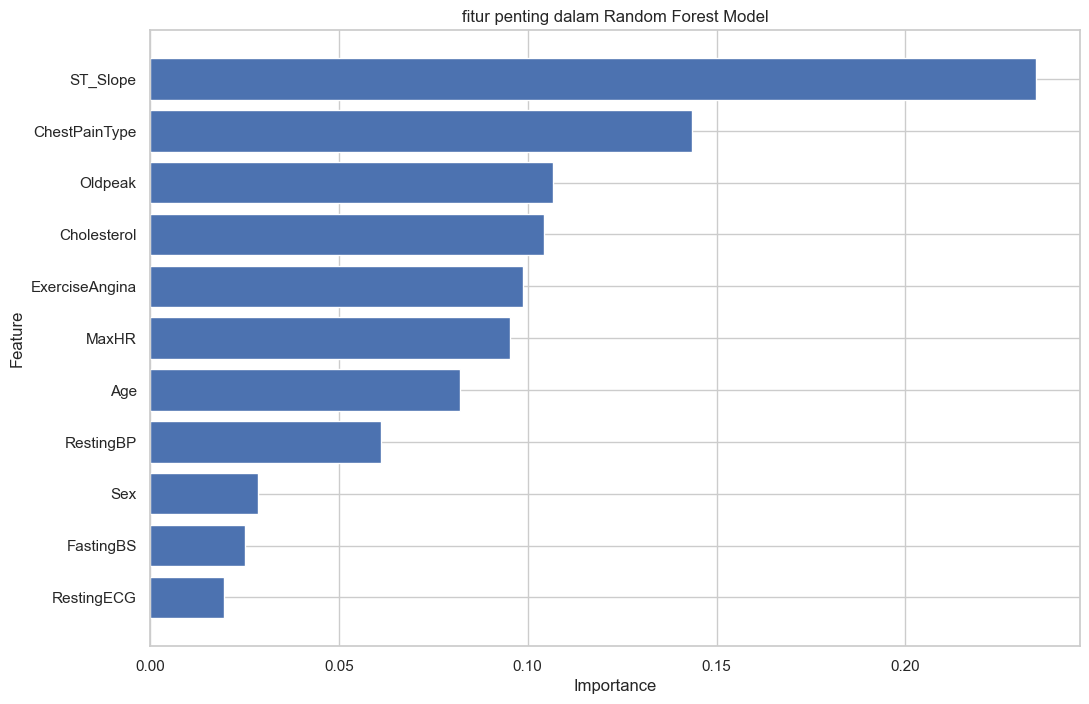

In [31]:
# Fitur penting dari model RandomForest
feature_importances = rf_mod.feature_importances_

# Nama kolom (fitur)
feature_names = X_train.columns
# Mengurutkan fitur berdasarkan pentingnya
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]
plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_names[::-1], sorted_importances[::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('fitur penting dalam Random Forest Model')
plt.show()

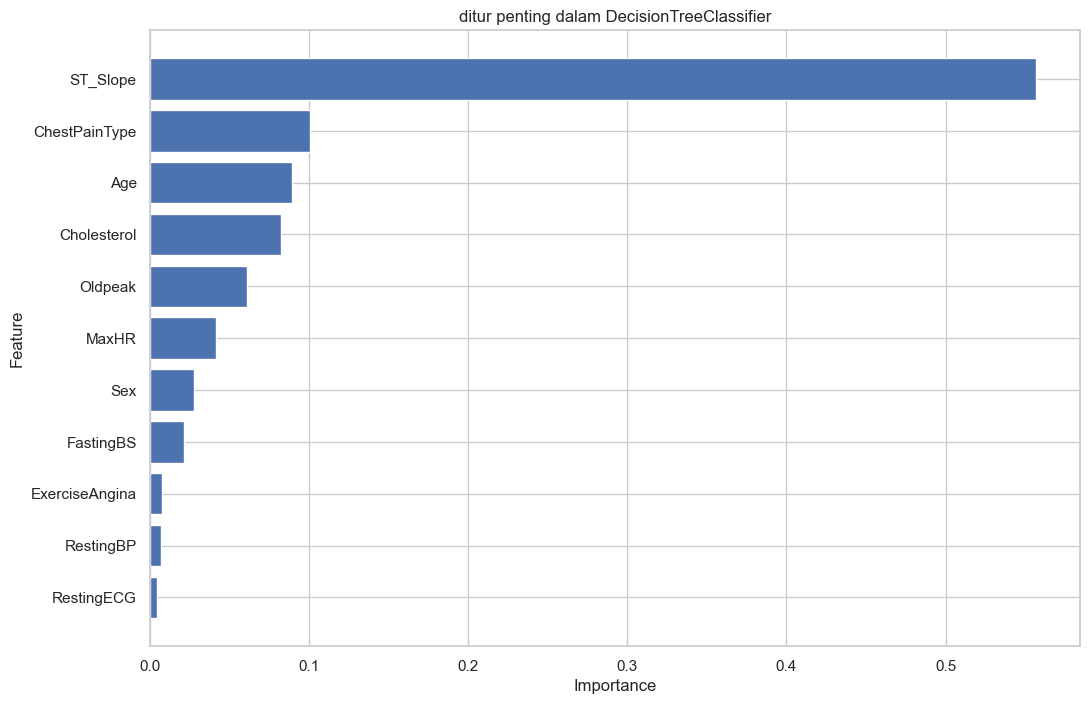

In [32]:
# Fitur penting dari model RandomForest
feature_importances = DT_mod.feature_importances_

# Nama kolom (fitur)
feature_names = X_train.columns
# Mengurutkan fitur berdasarkan pentingnya
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]
plt.figure(figsize=(12, 8))
plt.barh(sorted_feature_names[::-1], sorted_importances[::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('ditur penting dalam DecisionTreeClassifier')
plt.show()

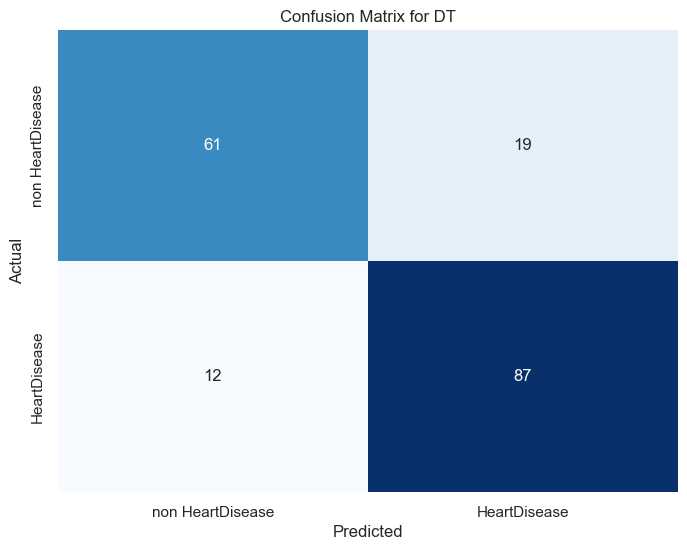

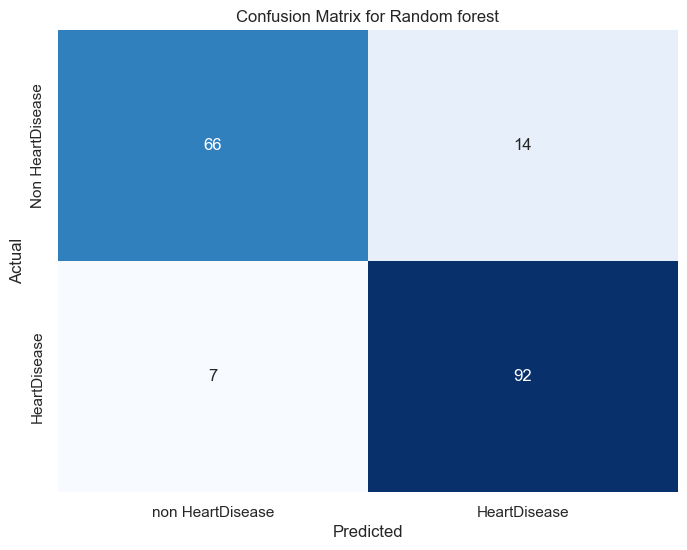

In [37]:
from sklearn.metrics import confusion_matrix
DT_pred = DT_mod.predict(X_test)
cfm_DT = confusion_matrix(y_test, DT_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cfm_DT, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=['non HeartDisease', 'HeartDisease'], 
            yticklabels=['non HeartDisease', 'HeartDisease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for DT')
plt.show()


rf_pred = rf_mod.predict(X_test)
cfm_rf = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cfm_rf, annot=True, cmap='Blues', fmt='g', cbar=False, 
            xticklabels=['non HeartDisease', 'HeartDisease'], 
            yticklabels=['Non HeartDisease', 'HeartDisease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random forest')
plt.show()

- DecisionTreeClassifier

berdsarakan prediksi terdapat 92 orang terkena penyakit jantung, 66 orang tidak terkena penyakit jantung dan secara aktual juga sama 
namun berjasarkan prediksi ada 14 orang terkena penyakit jantung namun berdasarkan data aktual tidak terkena penyakit jantung, dan dalam prediksi ada 7 orang tidak terkena penyakit jantung namun berdasarkan data aktual terkena penakit jantung

- random forest

berdsarakan prediksi terdapat 87 orang terkena penyakit jantung, 61 orang tidak terkena penyakit jantung dan secara aktual juga sama 
namun berjasarkan prediksi ada 19 orang terkena penyakit jantung namun berdasarkan data aktual tidak terkena penyakit jantung, dan dalam prediksi ada 12 orang tidak terkena penyakit jantung namun berdasarkan data aktual terkena penakit jantung